# Loading DK atlas from raj-utils

### Load module

Either add raj-utils to your path or load it following the steps below:

First make a pointer for the raj-utils directory

In [7]:
import importlib.util
import numpy as np

In [9]:
raj_utils_path = "../utils/atlas_utils.py"

spec = importlib.util.spec_from_file_location("atlas-utils.load_atlas", raj_utils_path)
raj_utils = importlib.util.module_from_spec(spec)
spec.loader.exec_module(raj_utils)

In [10]:
DK = raj_utils.load_atlas(atlas="DK").set_index('Name')

In [11]:
DK.tail()

,Short Name,x.mni,y.mni,z.mni,Hemisphere,Cortex,Other Name,Other Name 2,lobe,functional_system,index
Name,,,,,,,,,,,
Right-Pallidum,NaN,NaN,NaN,NaN,Right,subcortical,Pallidum_R,pallidum_rh,R Subcortical,subcortical,82
Right-Hippocampus,NaN,NaN,NaN,NaN,Right,subcortical,Hippocampus_R,hippocampus_rh,R Subcortical,subcortical,83
Right-Amygdala,NaN,NaN,NaN,NaN,Right,subcortical,Amygdala_R,amygdala_rh,R Subcortical,subcortical,84
Right-Accumbens-area,NaN,NaN,NaN,NaN,Right,subcortical,Accumbens_area_R,accumbensarea_rh,R Subcortical,subcortical,85
Right-VentralDC/Hypothalamus,NaN,NaN,NaN,NaN,Right,subcortical,Hypothalamus_R,ventralDC/Hypothalamus_rh,R Subcortical,subcortical,86


### Slicing the data: get coordinates

In [12]:
# Getting coordinates (2 options: use loc[lines, columns] or [[]])
# DK_coords = DK.loc[:, 'x.mni':'z.mni']
DK_coords = DK[['x.mni','y.mni','z.mni']]
DK_coords.head()

,x.mni,y.mni,z.mni
Name,,,
ctx-lh-bankssts,-56.0,-44.0,5.0
ctx-lh-caudalanteriorcingulate,-2.0,21.0,27.0
ctx-lh-caudalmiddlefrontal,-45.0,18.0,46.0
ctx-lh-cuneus,-1.0,-82.0,20.0
ctx-lh-entorhinal,-16.0,-10.0,-29.0


### Get region names

In [13]:
region_names = list(DK_coords.index)

### Connectivity

In [94]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd
from scipy.stats import pearsonr

In [107]:
ADNI_conn = loadmat('../data/dk_ADNI_averaged.mat')['connectome_avg']
Pedros_conn = loadmat('../data/dk_conn_meanACS69.mat')['meanACS']
bobby_matrix = pd.read_csv('../data/mean80_fibercount.csv').set_index(bobby_matrix.columns)

LRLR_order = ['ctx-lh-bankssts','ctx-lh-caudalanteriorcingulate','ctx-lh-caudalmiddlefrontal','ctx-lh-cuneus','ctx-lh-entorhinal','ctx-lh-fusiform','ctx-lh-inferiorparietal','ctx-lh-inferiortemporal','ctx-lh-isthmuscingulate','ctx-lh-lateraloccipital','ctx-lh-lateralorbitofrontal','ctx-lh-lingual','ctx-lh-medialorbitofrontal','ctx-lh-middletemporal','ctx-lh-parahippocampal','ctx-lh-paracentral','ctx-lh-parsopercularis','ctx-lh-parsorbitalis','ctx-lh-parstriangularis','ctx-lh-pericalcarine','ctx-lh-postcentral','ctx-lh-posteriorcingulate','ctx-lh-precentral','ctx-lh-precuneus','ctx-lh-rostralanteriorcingulate','ctx-lh-rostralmiddlefrontal','ctx-lh-superiorfrontal','ctx-lh-superiorparietal','ctx-lh-superiortemporal','ctx-lh-supramarginal','ctx-lh-frontalpole','ctx-lh-temporalpole','ctx-lh-transversetemporal','ctx-lh-insula','ctx-rh-bankssts','ctx-rh-caudalanteriorcingulate','ctx-rh-caudalmiddlefrontal','ctx-rh-cuneus','ctx-rh-entorhinal','ctx-rh-fusiform','ctx-rh-inferiorparietal','ctx-rh-inferiortemporal','ctx-rh-isthmuscingulate','ctx-rh-lateraloccipital','ctx-rh-lateralorbitofrontal','ctx-rh-lingual','ctx-rh-medialorbitofrontal','ctx-rh-middletemporal','ctx-rh-parahippocampal','ctx-rh-paracentral','ctx-rh-parsopercularis','ctx-rh-parsorbitalis','ctx-rh-parstriangularis','ctx-rh-pericalcarine','ctx-rh-postcentral','ctx-rh-posteriorcingulate','ctx-rh-precentral','ctx-rh-precuneus','ctx-rh-rostralanteriorcingulate','ctx-rh-rostralmiddlefrontal','ctx-rh-superiorfrontal','ctx-rh-superiorparietal','ctx-rh-superiortemporal','ctx-rh-supramarginal','ctx-rh-frontalpole','ctx-rh-temporalpole','ctx-rh-transversetemporal','ctx-rh-insula','Left-Cerebellum-Cortex','Left-Thalamus-Proper','Left-Caudate','Left-Putamen','Left-Pallidum','Left-Hippocampus','Left-Amygdala','Left-Accumbens-area','Left-VentralDC','Right-Cerebellum-Cortex','Right-Thalamus-Proper','Right-Caudate','Right-Putamen','Right-Pallidum','Right-Hippocampus','Right-Amygdala','Right-Accumbens-area','Right-VentralDC']
reordered_bobby = bobby_matrix[LRLR_order].loc[LRLR_order]

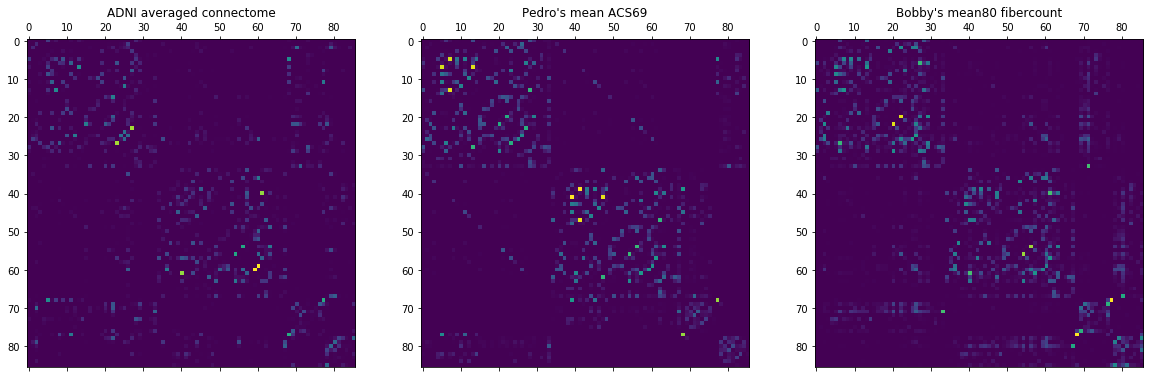

In [122]:
plt.figure(figsize=(20,20))

plt.subplot(1, 3, 1)
plt.title('ADNI averaged connectome')
_ = plt.matshow(ADNI_conn, fignum=False)

plt.subplot(1, 3, 2)
plt.title("Pedro's mean ACS69")
_ = plt.matshow(Pedros_conn, fignum=False)

plt.subplot(1, 3, 3)
plt.title("Bobby's mean80 fibercount")
_ = plt.matshow(reordered_bobby, fignum=False)